#### Teoría de Circuitos II

# Tarea Semanal 10

#### Por Nahuel Braian Contreras

### Actividad
Los cáclulos del ejercicios se realizaron en OneNote

In [3]:
from IPython.display import IFrame
IFrame("TS10.pdf", width=900, height=900)

### Comprobacion

Comprobaremos los resultados obtenidos analíticamente a traves de simulación por python.

### Ejercicio 1
#### a) Foster Derivación

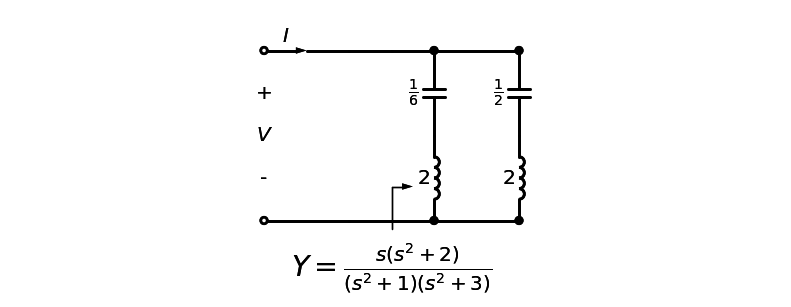

In [4]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor

# Resolución simbólica

s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
ZZ = (s**2+3)*(s**2+1)/(s*(s**2+2))

# a) ZZ según Foster derivación

# Implementaremos Imm mediante Foster
k0, koo, ki = tc2.foster(1/ZZ)

tc2.dibujar_foster_derivacion(k0, koo, ki, y_exc = 1/ZZ)

#### b) Cauer 1

<IPython.core.display.Math object>

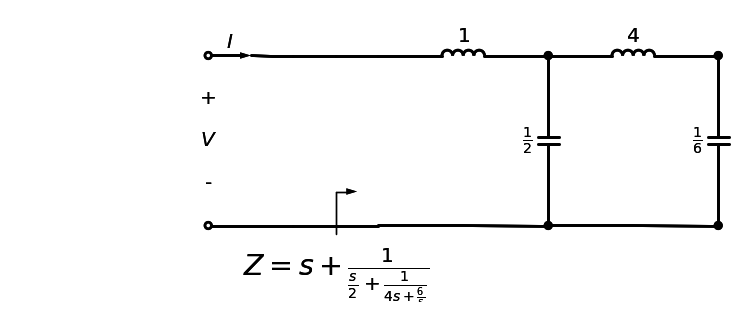

In [5]:
# b) ZZ según Cauer1 (removiendo en oo) 

koo, imm_cauer_oo, rem = tc2.cauer_LC(ZZ, remover_en_inf=True)

tc2.print_latex( r'$' + sp.latex(ZZ) + r'=' + sp.latex(imm_cauer_oo) + r'$' )

# Tratamos a nuestra función inmitancia como una Z
tc2.dibujar_cauer_LC(koo, z_exc = imm_cauer_oo)

#### b) Cauer 2

<IPython.core.display.Math object>

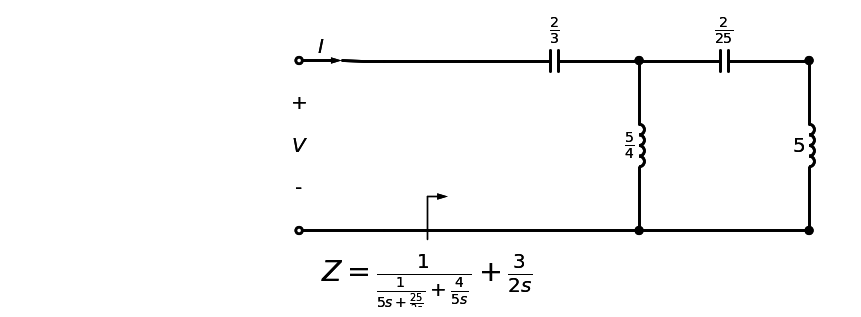

In [6]:
# b) ZZ según Cauer2 (removiendo en 0) 
k0, imm_cauer_0, rem = tc2.cauer_LC(ZZ, remover_en_inf=False)

tc2.print_latex( r'$' + sp.latex(ZZ) + r'=' + sp.latex(imm_cauer_0) + r'$' )

# Tratamos a nuestra función inmitancia como una Z
tc2.dibujar_cauer_LC(k0, z_exc = imm_cauer_0)
    

### Ejercicio 2

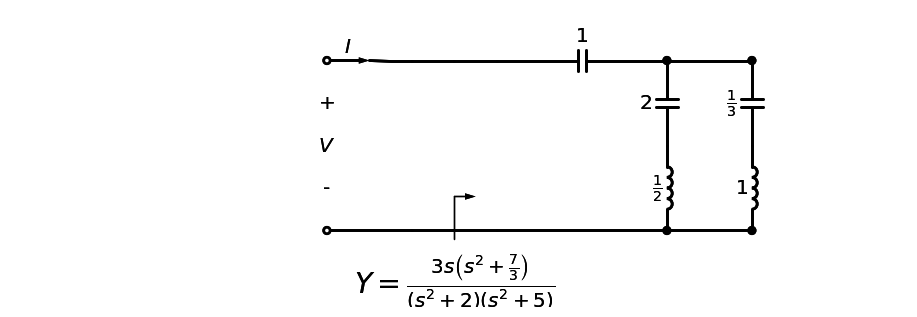

In [7]:
from schemdraw.elements import  Resistor, Capacitor, Inductor

s = sp.symbols('s ', complex=True)

YY = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)

# Restricción circuital: L2*C2 = 1 r/s
# remoción parcial en infinito de 1/YY

omega_L2C2 = 1

Z2, Zc1 = tc2.remover_polo_dc(1/YY, omega_zero = omega_L2C2 )

# Yc1 es la admitancia removida
# extraigo C1
C1 = 1/(s*Zc1)

Y4, Yt2, L2, C2 = tc2.remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )

# quedaría solo un tanque en Y4, no especifico omega.
Y6, Zt3, L3, C3 = tc2.remover_polo_jw(Y4, isImpedance = False)


# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Y',  
                                          YY, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_serie(d, Capacitor, C1)

d = tc2.dibujar_tanque_derivacion(d, L2, C2)

d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_tanque_derivacion(d, L3, C3)

display(d)